In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
def print_result(Fh, Fcrit, alpha):
    print(f'''
Расчётный критерий Фишера: {Fh}
Табличный критерий Фишера для уровня значимости {alpha}: {Fcrit}
Различие между группами статистически {'значимое'  if Fh > Fcrit else 'не значимое'}''')

## Урок 8. Дисперсионный анализ. Логистическая регрессия

### 1. Провести дисперсионный анализ для определения того, есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов.
Даны значения роста в трех группах случайно выбранных спортсменов:  
Футболисты: 173, 175, 180, 178, 177, 185, 183, 182.  
Хоккеисты: 177, 179, 180, 188, 177, 172, 171, 184, 180.  
Штангисты: 172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170.  

In [3]:
# наблюдения в группах
y1 = np.array([173, 175, 180, 178, 177, 185, 183, 182])
y2 = np.array([177, 179, 180, 188, 177, 172, 171, 184, 180])
y3 = np.array([172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170])

# уровень значимости
alpha = 0.05

In [4]:
# РЕШЕНИЕ 1

# количество степеней свободы (кол-во групп)
k = 3

# количество наблюдений по группам
n1 = y1.shape[0]
n2 = y2.shape[0]
n3 = y3.shape[0]

# общее кол-во наблюдений
n = n1 + n2 + n3

# средние значения по группам
m1 = y1.mean()
m2 = y2.mean()
m3 = y3.mean()

# общее среднее значение
M = (y1.sum() + y2.sum() + y3.sum()) / n

# сумма квадратов отклонений наблюдений от общего среднего
Ss = ((y1 - M) ** 2).sum() + ((y2 - M) ** 2).sum() + ((y3 - M) ** 2).sum()

# сумма квадратов отклонений средних групповых значений от общего среднего значения
Ssf = ((m1 - M) ** 2 * n1) + ((m2 - M) ** 2 * n2) + ((m3 - M) ** 2 * n3)

# остаточная сумма квадратов отклонений
Sso = ((y1 - m1) ** 2).sum() + ((y2 - m2) ** 2).sum() + ((y3 - m3) ** 2).sum()

# факторная дисперсия
Df = Ssf / (k - 1)

# остаточная дисперсия
Do = Sso / (n - k)

# критерий Фишера
Fh = Df / Do

# табличный критерий Фишера для уровня значимости alpha
Fcrit = 3.59

print_result(Fh, Fcrit, alpha)


Расчётный критерий Фишера: 5.500053450812598
Табличный критерий Фишера для уровня значимости 0.05: 3.59
Различие между группами статистически значимое


In [5]:
# РЕШЕНИЕ 2

alpha = 0.05
Fcrit = 3.59
Fh = stats.f_oneway(y1, y2, y3)[0]

print_result(Fh, Fcrit, alpha)


Расчётный критерий Фишера: 5.500053450812596
Табличный критерий Фишера для уровня значимости 0.05: 3.59
Различие между группами статистически значимое


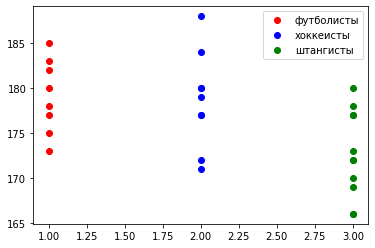

In [6]:
plt.plot([1 for _ in y1], y1, 'o', color='red', label='футболисты');
plt.plot([2 for _ in y2], y2, 'o', color='blue', label='хоккеисты');
plt.plot([3 for _ in y3], y3, 'o', color='green', label='штангисты');
plt.legend()
plt.show()